## <center>Case Study on Correlation and Regression

#### Loading the dataset to python environment

In [1]:
import pandas as pd
Adds= pd.read_csv('Add_sales_data_2018.csv')

#### Checking the basic details of the dataset

In [2]:
Adds.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
Adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


There are 205 rows and 7 columns in the data set.Columns are named as Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),and Profit(in Thousands).
Except date column, all other columns are having 'float64' type data.
No nullvalues are present in the data set

#### Q.1) First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

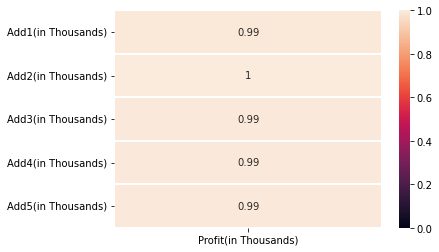

In [4]:
# finding the correlation 
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=Adds.corr()
x=corr_matrix.iloc[:5,5:] # selcting only the required row and column to show the relationship
sns.heatmap(x,vmin=0,vmax=1,linewidths=0.2,annot=True)
plt.show()

Correlation coefficient of +1( approximated by 2 decimal points) between Add2 and Profit shows a perfect positive correlation.  Correlation coefficient of 0.99 between Add1,Add3,Add4,Add5 and Profit generated shows a very high (or near to perfect)positive correlation.This indicates that as amount spent for advertising (through five different companies) increases, profit also increases.In the case of perfect positive correlation,increase is through an exact linear rule.

#### Q.2) Build a regression model to predict the profit from the given data and comment your findings on it.

In [5]:
# Displaying the columns(features) of the dataset 
Adds.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [6]:
#isolating into dependent and independent variable.
#Here dependent feature is profit and independent features are amount spent for advertising through five different companies.
y=Adds['Profit(in Thousands)']
X=Adds.drop(['Date','Profit(in Thousands)'],axis=1)

In [7]:
# splitting into test and training set(supervised learning)
# major part of data to be given to training,here =0.75
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [8]:
from sklearn import linear_model

In [9]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train) # giving traing data to model

In [10]:
# model is ready to predict profit

In [11]:
#storing the predictions of profit for each X_test(amount spent for advertising through five different companies)
# using an array named predictions
predictions=model.predict(X_test)   

In [12]:
# There is a corresponding profit(observed)for each X-test(amount spent for advertising through five different companies)
# printing only the first five values 
print(y_test.head(5))

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
Name: Profit(in Thousands), dtype: float64


In [13]:
# Printing the predicted values for profit
print(predictions[:5])

[4152.066 4446.441 5131.898 4907.56  5004.282]


In [14]:
# Difference in observed and predicted value constitute Mean squared Error.
from sklearn.metrics import mean_squared_error

In [15]:
print('MSE is:',round(mean_squared_error(y_test,predictions))) # by comparing observed values of profit and predicted value

MSE is: 0


When a model has no error, the MSE equals zero(usually this doesn’t occur in practice).
But in the above said problem ,MSE is found to be zero,this can be due to several reasons: perfect correlation and near to perfect correlation among all the features and smaller sample size. When the model has a high correlation with the training data, model will learn to extract trends from the training set.

In [16]:
corr_matrix # displaying the correlation matrix to show linear relation among different features of the data set.

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


#### Q.3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
##### Add1(in Thousands): 290  ;   Add2(in Thousands): 312 ;   Add3(in Thousands):  309;   Add4(in Thousands):298   ;  Add5(in Thousands): 320

In [17]:
data = [{'Add1(in Thousands)':290, 'Add2(in Thousands)': 312, 'Add3(in Thousands)':309,'Add4(in Thousands)':298, 'Add5(in Thousands)': 320, }]
# Creates DataFrame.
X_new=pd.DataFrame(data)

In [18]:
X_new

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [19]:
profit_predicted=model.predict(X_new)

In [20]:
profit_predicted

array([5820.06])

For the given spending for advertising through five different companies,the profit generated is 5820.06(in Thousands) 